In [67]:
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
file_name = '/content/gdrive/MyDrive/Colab Notebooks/KPMG Data Analytics Consulting Virtual Internship/Task 2/Dataset/KPMG_VI_New_raw_data_update_final.xlsx'

In [70]:
demo_df = pd.read_excel(file_name, header=1, sheet_name='CustomerDemographic', index_col=0)

<ipython-input-70-a98d933cb617>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demo_df = pd.read_excel(file_name, header=1, sheet_name='CustomerDemographic', index_col=0)


In [71]:
# code for displaying all columns in notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [72]:
demo_df.head()

first_name  last_name  gender  \
customer_id                                      
1                   Laraine  Medendorp       F   
2                       Eli    Bockman    Male   
3                     Arlin     Dearle    Male   
4                    Talbot        NaN    Male   
5            Sheila-kathryn     Calton  Female   

             past_3_years_bike_related_purchases        DOB  \
customer_id                                                   
1                                             93 1953-10-12   
2                                             81 1980-12-16   
3                                             61 1954-01-20   
4                                             33 1961-10-03   
5                                             56 1977-05-13   

                          job_title job_industry_category     wealth_segment  \
customer_id                                                                    
1               Executive Secretary                Health      Mass Customer   
2            Administrative Officer    Financial Services      Mass Customer   
3                Recruiting Manager              Property      Mass Customer   
4                               NaN                    IT      Mass Customer   
5                     Senior Editor                   NaN  Affluent Customer   

            deceased_indicator  \
customer_id                      
1                            N   
2                            N   
3                            N   
4                            N   
5                            N   

                                                       default owns_car  \
customer_id                                                               
1                                                           "'      Yes   
2                                 <script>alert('hi')</script>      Yes   
3                                          2018-02-01 00:00:00      Yes   
4            () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No   
5                                                          NIL      Yes   

             tenure  
customer_id          
1              11.0  
2              16.0  
3              15.0  
4               7.0  
5               8.0

In [73]:
demo_df.shape

(4000, 12)

In [74]:
demo_df = demo_df.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)
demo_df['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
demo_df['gender'].replace('M', 'Male', inplace=True)
demo_df['gender'].replace('U', 'Unknown', inplace=True)
demo_df['deceased_indicator'].replace(['N'], 0, inplace=True)
demo_df['deceased_indicator'].replace(['Y'], 1, inplace=True)
demo_df['owns_car'].replace('Yes', 1, inplace=True)
demo_df['owns_car'].replace('No', 0, inplace=True)
demo_df = demo_df[demo_df['DOB'] != demo_df.DOB.min()]
demo_df[demo_df['deceased_indicator'] == 0]
demo_df = demo_df.drop(['deceased_indicator'], axis=1)
demo_df_clean = demo_df.dropna()
demo_df_clean.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
6              Male                                   35 1966-09-16   

            job_industry_category  wealth_segment  owns_car  tenure  
customer_id                                                          
1                          Health   Mass Customer         1    11.0  
2              Financial Services   Mass Customer         1    16.0  
3                        Property   Mass Customer         1    15.0  
4                              IT   Mass Customer         0     7.0  
6                          Retail  High Net Worth         1    13.0

In [75]:
demo_df_clean.shape

(3256, 7)

In [76]:
demo_df_clean['age'] = (dt.datetime.now() - demo_df_clean['DOB']) / np.timedelta64(1, 'Y')
demo_df_clean['age_class'] = ((round(demo_df_clean['age'] / 10)) * 10).astype(int)
demo_df_clean.head()

<ipython-input-76-ee226aa8ec16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df_clean['age'] = (dt.datetime.now() - demo_df_clean['DOB']) / np.timedelta64(1, 'Y')
<ipython-input-76-ee226aa8ec16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df_clean['age_class'] = ((round(demo_df_clean['age'] / 10)) * 10).astype(int)


gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
6              Male                                   35 1966-09-16   

            job_industry_category  wealth_segment  owns_car  tenure  \
customer_id                                                           
1                          Health   Mass Customer         1    11.0   
2              Financial Services   Mass Customer         1    16.0   
3                        Property   Mass Customer         1    15.0   
4                              IT   Mass Customer         0     7.0   
6                          Retail  High Net Worth         1    13.0   

                   age  age_class  
customer_id                        
1            69.743842         70  
2            42.564640         40  
3            69.470052         70  
4            61.768319         60  
6            56.815445         60

In [77]:
addr_df = pd.read_excel(file_name, header=1, sheet_name='CustomerAddress', index_col=0)
addr_df.head()

address  postcode            state    country  \
customer_id                                                              
1             060 Morning Avenue      2016  New South Wales  Australia   
2            6 Meadow Vale Court      2153  New South Wales  Australia   
4             0 Holy Cross Court      4211              QLD  Australia   
5            17979 Del Mar Point      2448  New South Wales  Australia   
6               9 Oakridge Court      3216              VIC  Australia   

             property_valuation  
customer_id                      
1                            10  
2                            10  
4                             9  
5                             4  
6                             9

In [78]:
addr_df.shape

(3999, 5)

In [79]:
addr_df['state'].replace('New South Wales', 'NSW', inplace=True)
addr_df['state'].replace('Victoria', 'VIC', inplace=True)
addr_df_clean = addr_df.dropna()
addr_df_clean.head()

address  postcode state    country  \
customer_id                                                   
1             060 Morning Avenue      2016   NSW  Australia   
2            6 Meadow Vale Court      2153   NSW  Australia   
4             0 Holy Cross Court      4211   QLD  Australia   
5            17979 Del Mar Point      2448   NSW  Australia   
6               9 Oakridge Court      3216   VIC  Australia   

             property_valuation  
customer_id                      
1                            10  
2                            10  
4                             9  
5                             4  
6                             9

In [80]:
addr_df_clean.shape

(3999, 5)

In [81]:
demo_addr_df = pd.merge(demo_df_clean, addr_df_clean, left_index=True, right_index=True)
demo_addr_df= demo_addr_df.dropna()
demo_addr_df.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
4              Male                                   33 1961-10-03   
6              Male                                   35 1966-09-16   
7            Female                                    6 1976-02-23   

            job_industry_category     wealth_segment  owns_car  tenure  \
customer_id                                                              
1                          Health      Mass Customer         1    11.0   
2              Financial Services      Mass Customer         1    16.0   
4                              IT      Mass Customer         0     7.0   
6                          Retail     High Net Worth         1    13.0   
7              Financial Services  Affluent Customer         1    11.0   

                   age  age_class              address  postcode state  \
customer_id                                                              
1            69.743842         70   060 Morning Avenue      2016   NSW   
2            42.564640         40  6 Meadow Vale Court      2153   NSW   
4            61.768319         60   0 Holy Cross Court      4211   QLD   
6            56.815445         60     9 Oakridge Court      3216   VIC   
7            47.377880         50     4 Delaware Trail      2210   NSW   

               country  property_valuation  
customer_id                                 
1            Australia                  10  
2            Australia                  10  
4            Australia                   9  
6            Australia                   9  
7            Australia                   9

In [82]:
demo_addr_df.shape

(3253, 14)

In [83]:
txns_df = pd.read_excel(file_name, header=1, sheet_name='Transactions', index_col=0)
txns_df = txns_df.sort_values('customer_id')
txns_df.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost  \
transaction_id                                           
14486                 small      688.63         612.88   
18970                medium     1274.93         764.96   
16423                medium      742.54         667.40   
5157                  small     1720.70        1531.42   
13424                medium       71.49          53.62   

                product_first_sold_date  
transaction_id                           
14486                           33455.0  
18970                           35378.0  
16423                           37838.0  
5157                            37823.0  
13424                           38573.0

In [84]:
txns_df.shape

(20000, 12)

In [85]:
txns_df['product_first_sold_date'] = pd.TimedeltaIndex(txns_df['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
txns_df.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost product_first_sold_date  
transaction_id                                                                  
14486                 small      688.63         612.88              1991-08-07  
18970                medium     1274.93         764.96              1996-11-11  
16423                medium      742.54         667.40              2003-08-07  
5157                  small     1720.70        1531.42              2003-07-23  
13424                medium       71.49          53.62              2005-08-11

In [86]:
txns_df_clean = txns_df.dropna()
txns_df_clean.shape

(19445, 12)

In [87]:
txns_df_clean['transaction_date'].describe(datetime_is_numeric=True)

count                            19445
mean     2017-07-01 16:21:18.189766144
min                2017-01-01 00:00:00
25%                2017-04-01 00:00:00
50%                2017-07-03 00:00:00
75%                2017-10-02 00:00:00
max                2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [88]:
most_recent_purchase = txns_df_clean['transaction_date'].max()
txns_df_clean['last_purchase_days_ago'] = most_recent_purchase - txns_df_clean['transaction_date']
txns_df_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
txns_df_clean['profit'] = txns_df_clean['list_price'] - txns_df_clean['standard_cost']
txns_df_clean.head()


<ipython-input-88-2b7073f23eba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txns_df_clean['last_purchase_days_ago'] = most_recent_purchase - txns_df_clean['transaction_date']
<ipython-input-88-2b7073f23eba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txns_df_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
<ipython-input-88-2b7073f23eba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost  \
transaction_id                                           
14486                 small      688.63         612.88   
18970                medium     1274.93         764.96   
16423                medium      742.54         667.40   
5157                  small     1720.70        1531.42   
13424                medium       71.49          53.62   

               product_first_sold_date  last_purchase_days_ago  profit  
transaction_id                                                          
14486                       1991-08-07                   278.0   75.75  
18970                       1996-11-11                   276.0  509.97  
16423                       2003-08-07                    21.0   75.14  
5157                        2003-07-23                   233.0  189.28  
13424                       2005-08-11                   312.0   17.87

In [91]:
txns_df_clean.shape

(19445, 14)

In [102]:
txns_df_clean['customer_id'].max()

5034

In [94]:
rfmTable = txns_df_clean.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency',
    'customer_id': 'frequency',
    'profit': 'monetary_value'
    }, inplace=True
)

In [96]:
rfmTable.head()

recency  frequency  monetary_value
customer_id                                    
1                7.0         11         3018.09
2              128.0          3         2226.26
3              102.0          7         3290.21
4              195.0          2          220.57
5               16.0          6         2394.94

In [99]:
rfmTable.shape

(3492, 3)

In [103]:
rfmTable.describe()

recency    frequency  monetary_value
count  3492.000000  3492.000000     3492.000000
mean     62.495991     5.568442     3072.398721
std      59.190890     2.291344     1749.132514
min       0.000000     1.000000       15.080000
25%      18.000000     4.000000     1797.430000
50%      45.000000     5.000000     2798.990000
75%      88.000000     7.000000     4122.440000
max     353.000000    14.000000    11668.950000

In [100]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

recency  frequency  monetary_value
0.25     18.0        4.0         1797.43
0.50     45.0        5.0         2798.99
0.75     88.0        7.0         4122.44

In [104]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 1

In [105]:
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmSeg.head()

recency  frequency  monetary_value  r_score  f_score  m_score
customer_id                                                               
1                7.0         11         3018.09        1        1        3
2              128.0          3         2226.26        4        4        2
3              102.0          7         3290.21        4        3        3
4              195.0          2          220.57        4        4        4
5               16.0          6         2394.94        1        3        2

In [106]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

recency  frequency  monetary_value  r_score  f_score  m_score  \
customer_id                                                                  
1                7.0         11         3018.09        1        1        3   
2              128.0          3         2226.26        4        4        2   
3              102.0          7         3290.21        4        3        3   
4              195.0          2          220.57        4        4        4   
5               16.0          6         2394.94        1        3        2   

             rfm_class  total_score  
customer_id                          
1                  113            5  
2                  442           10  
3                  433           10  
4                  444           12  
5                  132            6

In [107]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75),
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [108]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]:
        return 'bronze'
    else:
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg

recency  frequency  monetary_value  r_score  f_score  m_score  \
customer_id                                                                  
1                7.0         11     3018.090000        1        1        3   
2              128.0          3     2226.260000        4        4        2   
3              102.0          7     3290.210000        4        3        3   
4              195.0          2      220.570000        4        4        4   
5               16.0          6     2394.940000        1        3        2   
6               64.0          5     3946.550000        3        2        3   
7              253.0          3      220.110000        4        4        4   
8               22.0          9     5364.390000        2        1        1   
9               78.0          6     2353.110000        3        3        2   
10              43.0          5     3358.280000        2        2        3   
11              46.0          5     3091.560000        3        2        3   
12              67.0          7     3540.030000        3        3        3   
13              27.0          7     4337.380000        2        3        1   
14              47.0          3     1713.900000        3        4        4   
15              35.0          6     1728.390000        2        3        4   
16              99.0          5     4521.840000        4        2        1   
17               0.0          5     2015.610000        1        2        2   
18             134.0          7     3543.380000        4        3        3   
19             280.0          2     1736.450000        4        4        4   
20              31.0          4     3608.280000        2        4        3   
21               6.0          5     4229.410000        1        2        1   
22              97.0          8     5159.840000        4        1        1   
23              10.0          6     4376.150000        1        3        1   
24              17.0          7     3689.350000        1        3        3   
25               5.0         12     5333.660000        1        1        1   
26             259.0          2      268.240000        4        4        4   
27             143.0          7     3274.250000        4        3        3   
28              83.0          6     3366.560000        3        3        3   
29              22.0          9     6175.300000        2        1        1   
30              11.0          3     2633.950000        1        4        2   
31              89.0          4      426.110000        4        4        4   
32             138.0          7     2823.120000        4        3        3   
33              38.0          7     5294.270000        2        3        1   
34             102.0          8     4825.590000        4        1        1   
35              92.0          4     3706.510000        4        4        3   
36             163.0          2      204.360000        4        4        4   
37               7.0          9     6338.490000        1        1        1   
38              50.0          4     2025.340000        3        4        2   
39              34.0         12     6085.170000        2        1        1   
40              14.0          5     3272.700000        1        2        3   
41              29.0          9     4698.890000        2        1        1   
42             111.0          4      427.040000        4        4        4   
43              61.0          9     3619.950000        3        1        3   
44              35.0          7     4768.280000        2        3        1   
45              43.0          3     1048.150000        2        4        4   
46              53.0          5     1623.630000        3        2        4   
47              35.0          7     4332.190000        2        3        1   
48              82.0          8     5561.080000        3        1        1   
49              36.0          4     2636.430000        2        4        2   
50              26.0          7    

In [109]:
addr_demo_txns = pd.merge(rfmSeg, demo_addr_df, left_index=True, right_index=True)
addr_demo_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_class', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [110]:
addr_demo_txns.shape


(2850, 23)

<Axes: xlabel='r_score'>

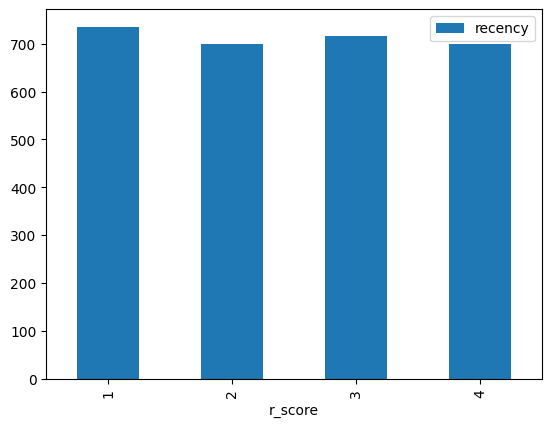

In [111]:
addr_demo_txns.groupby('r_score').agg('recency').count().to_frame().plot(kind='bar')

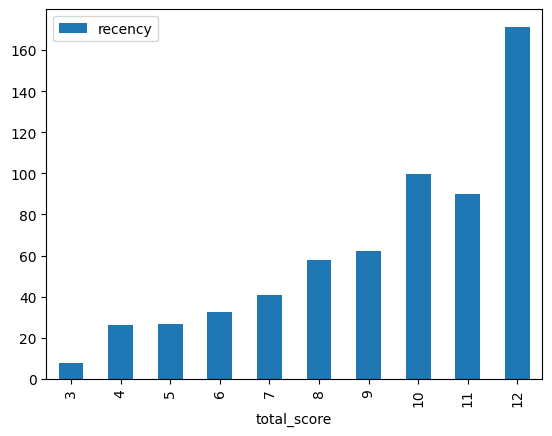

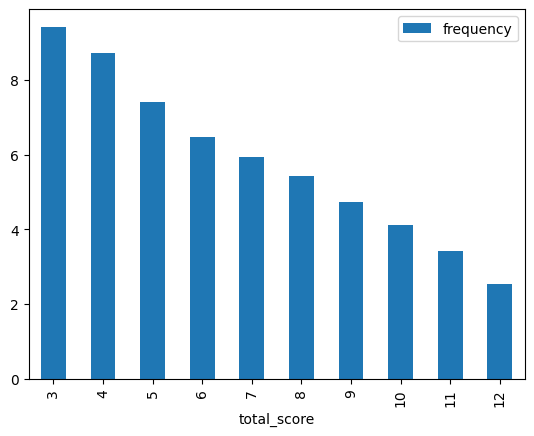

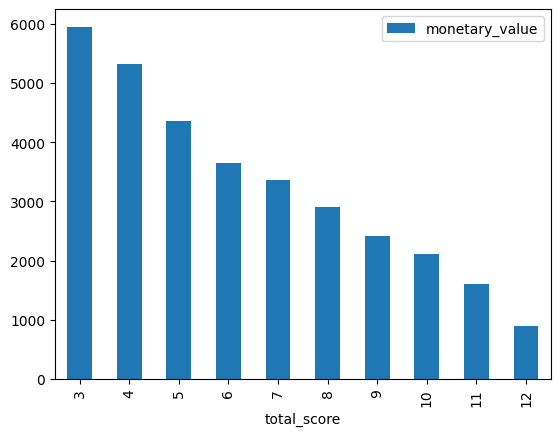

In [112]:
addr_demo_txns.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')
addr_demo_txns.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')
addr_demo_txns.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar')
plt.show()

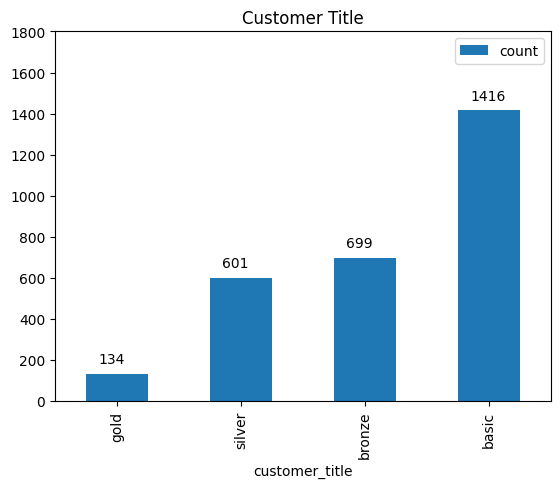

In [113]:
customer_titles_df = addr_demo_txns.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

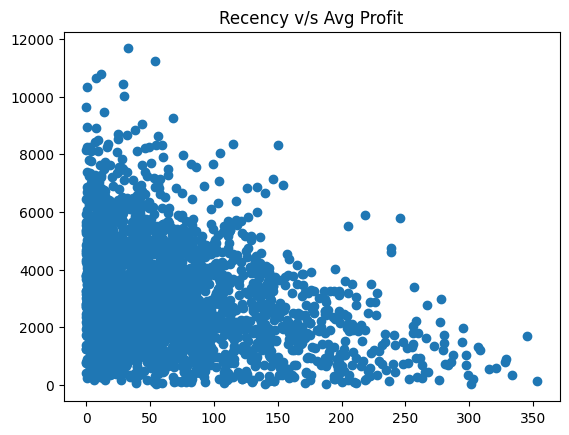

In [114]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['monetary_value'])
plt.title('Recency v/s Avg Profit')
plt.show()

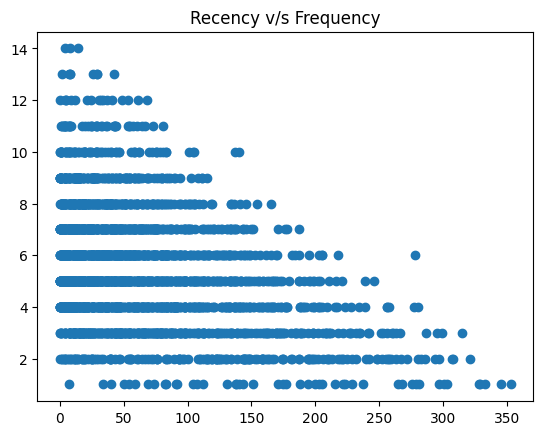

In [115]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['frequency'])
plt.title('Recency v/s Frequency')
plt.show()

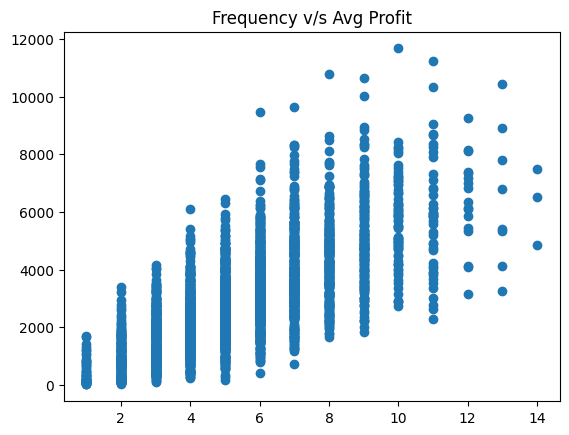

In [116]:
plt.scatter(addr_demo_txns['frequency'], addr_demo_txns['monetary_value'])
plt.title('Frequency v/s Avg Profit')
plt.show()

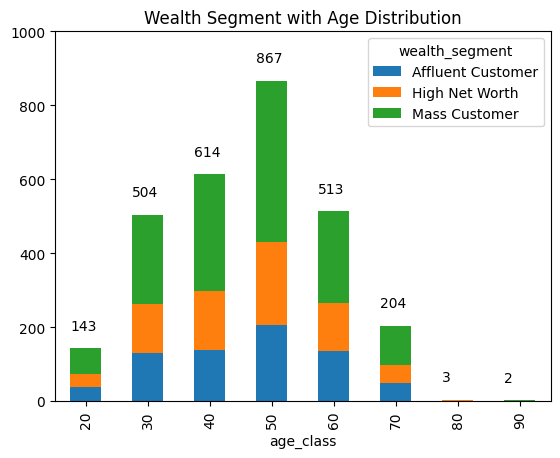

In [117]:
addr_demo_txns.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

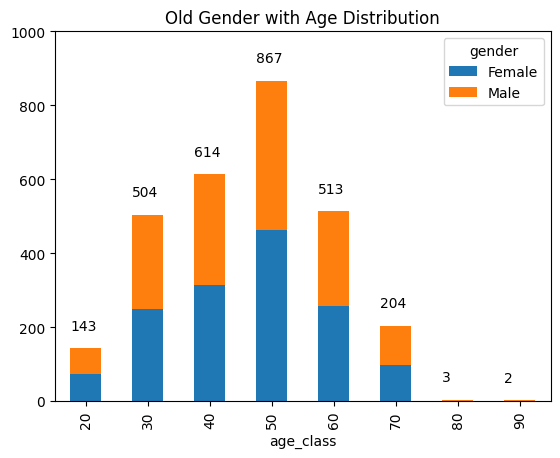

In [118]:
addr_demo_txns.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Gender with Age Distribution')
plt.show()

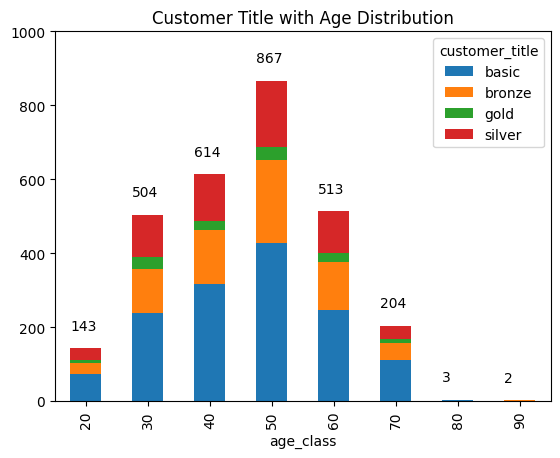

In [119]:
addr_demo_txns.groupby('age_class')['customer_title'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'customer_title': lambda x: len(x)})['customer_title']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Title with Age Distribution')
plt.show()

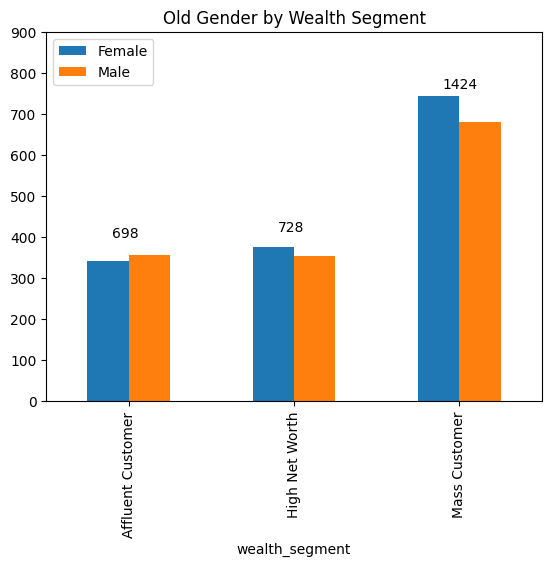

In [120]:
addr_demo_txns.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

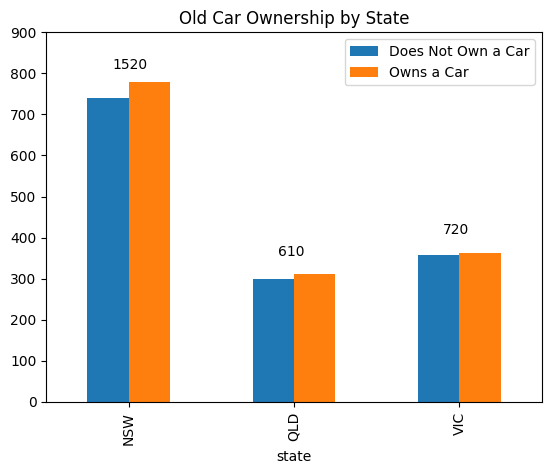

In [121]:
addr_demo_txns.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

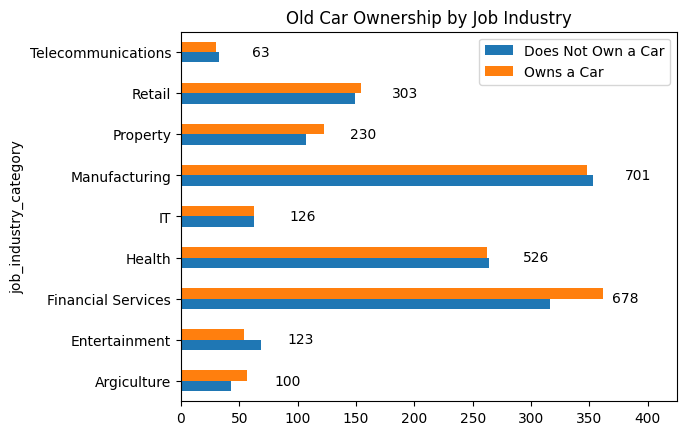

In [122]:
addr_demo_txns.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

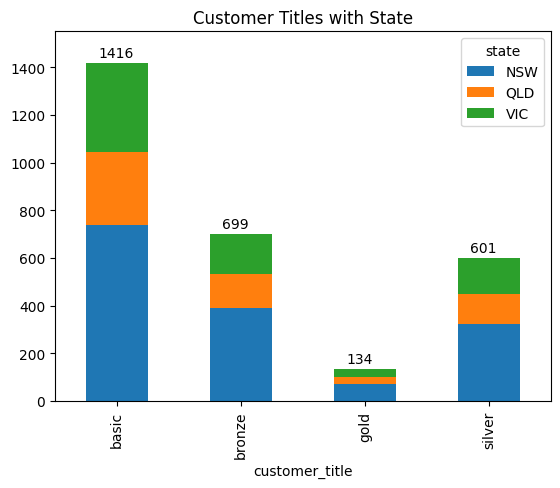

In [123]:
addr_demo_txns.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles with State')
plt.show()

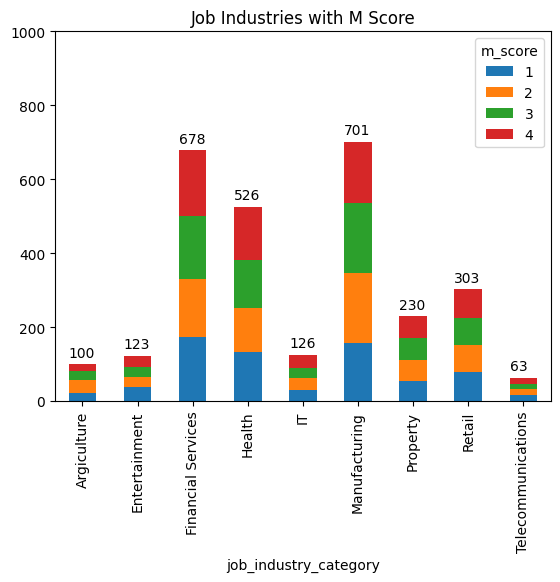

In [124]:
addr_demo_txns.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Job Industries with M Score')
plt.show()

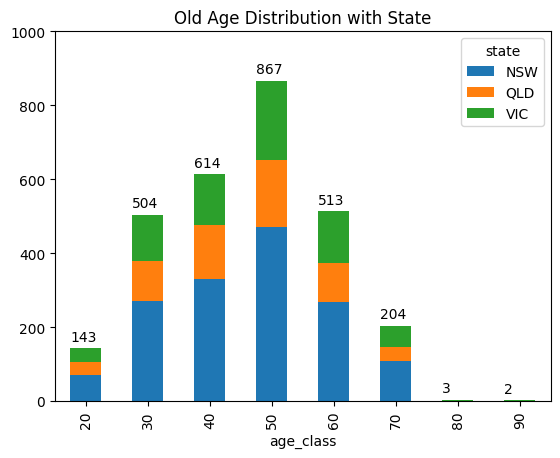

In [125]:
addr_demo_txns.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with State')
plt.show()

In [126]:
c = addr_demo_txns.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
c

count
gender       
Female  69844
Male    69516

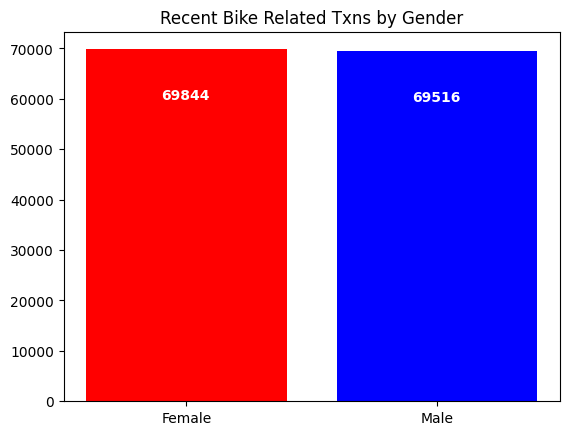

In [127]:
labels = ['Female', 'Male']
plt.bar(labels, c['count'], color=['red','blue'])
for i, v in enumerate(c['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Txns by Gender')
plt.show()

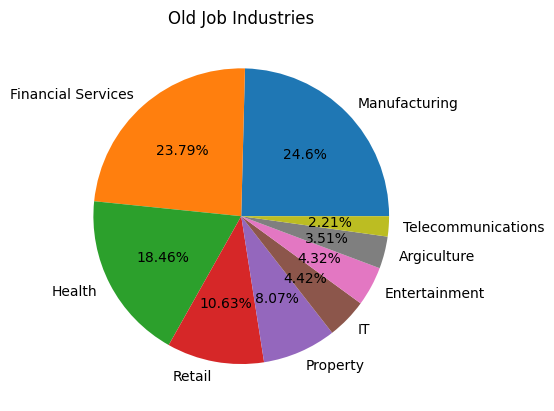

In [128]:
addr_demo_txns.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Old Job Industries')
plt.ylabel('')
plt.show()

In [129]:
c = addr_demo_txns.groupby('customer_title').agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
customer_title       
basic            1416
bronze            699
gold              134
silver            601

In [130]:
c = addr_demo_txns.groupby(['state','customer_title']).agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
state customer_title       
NSW   basic             738
      bronze            389
      gold               70
      silver            323
QLD   basic             305
      bronze            146
      gold               33
      silver            126
VIC   basic             373
      bronze            164
      gold               31
      silver            152

In [131]:
c = addr_demo_txns.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
total_score       
3              134
4              296
5              558
6              891
7             1300
8             1712
9             2110
10            2417
11            2595
12            2850

In [132]:
new_cust_list = pd.read_excel(file_name, header=1, sheet_name='NewCustomerList')
new_cust_list.head()

<ipython-input-132-0a3ce8a6bda4>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_cust_list = pd.read_excel(file_name, header=1, sheet_name='NewCustomerList')


first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  tenure              address  \
0      Mass Customer                  N      Yes      14     45 Shopko Center   
1      Mass Customer                  N       No      16    14 Mccormick Park   
2  Affluent Customer                  N       No      10  5 Colorado Crossing   
3  Affluent Customer                  N      Yes       5   207 Annamark Plaza   
4  Affluent Customer                  N       No      19    115 Montana Place   

   postcode state    country  property_valuation  Unnamed: 16  Unnamed: 17  \
0      4500   QLD  Australia                   6         0.56       0.7000   
1      2113   NSW  Australia                  11         0.89       0.8900   
2      3505   VIC  Australia                   5         1.01       1.0100   
3      4814   QLD  Australia                   1         0.87       1.0875   
4      2093   NSW  Australia                   9         0.52       0.5200   

   Unnamed: 18  Unnamed: 19  Unnamed: 20  Rank     Value  
0       0.8750     0.743750            1     1  1.718750  
1       1.1125     0.945625            1     1  1.718750  
2       1.0100     1.010000            1     1  1.718750  
3       1.0875     1.087500            4     4  1.703125  
4       0.6500     0.650000            4     4  1.703125

In [133]:
new_cust_list.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [134]:
new_cust_list.duplicated().sum()

0

In [135]:
new_cust_list.shape

(1000, 23)

In [136]:
new_cust_list_clean = new_cust_list.dropna()
new_cust_list_clean

first_name              last_name  gender  \
0          Chickie                Brister    Male   
1            Morly                 Genery    Male   
2          Ardelis              Forrester  Female   
3           Lucine                  Stutt  Female   
4          Melinda                 Hadlee  Female   
5            Druci                Brandli  Female   
6         Rutledge                  Hallt    Male   
7           Nancie                   Vian  Female   
8             Duff              Karlowicz    Male   
9          Barthel                 Docket    Male   
10        Rockwell                 Matson    Male   
11         Wheeler                Winward    Male   
13           Melba               Spellacy  Female   
14          Mandie                 Feares  Female   
16        Marcelia              Monkleigh  Female   
17       Winnifred           Beswetherick  Female   
18          Odilia                  Quick  Female   
19           Karly              Willavize  Female   
20          Teddie               Burchill    Male   
21          Gaston              Dallaghan    Male   
24           Brena              Schnitter  Female   
26           Dyane                Burwell  Female   
27        Claudine               Barstowk  Female   
28         Blinnie                   Roze  Female   
31           Brien                 Heaton    Male   
32         Sybilla                MacCart  Female   
34          Maisie                 Maddox  Female   
35          Arleen                Casbolt  Female   
41          Colene              Fishleigh  Female   
45           Gipsy               Ewestace  Female   
46          Sheena                 Kybbye  Female   
48            Gale                Disbrow  Female   
49         Thaxter              Kingsbury    Male   
51          Taylor            Steuhlmeyer    Male   
52        Griswold                Kelsall    Male   
54          Lavena               Seekings  Female   
55        Martelle                Tuppeny  Female   
56          Briant                 Ladley    Male   
60          Lorrie              Antonelli    Male   
61        Jedediah                  Kedie    Male   
62           Kaine             Smallcombe    Male   
63           Loise                Iltchev  Female   
64         Cristen                Maroney  Female   
65         Dorothy               Barnardo  Female   
66        Rosmunda               Duxbarry  Female   
67        Rozamond                   Riha  Female   
68          Gunner                  Petti    Male   
70        Sherilyn                 Canero  Female   
71          Bessie                 Roscow  Female   
72          Kevina               Ferandez  Female   
75         Hasheem               Groucock    Male   
76          Tobias               Woodhams    Male   
77         Glennis               Flintoff  Female   
78          Chanda                Mensler  Female   
79        Katheryn                 Kinner  Female   
80          Sumner              Carrivick    Male   
81         Valerie               Pickover  Female   
83          Gardie                Crellim    Male   
84            Sean             O'Loughlin    Male   
86          Marysa                 Rouchy  Female   
88           Ossie                 Midden    Male   
89             Sid                Carlone    Male   
91        Patricia                 Everix  Female   
96           Symon                  Mawne    Male   
97          Karlik                Penchen    Male   
98           Bengt                 Bilson    Male   
99       Evangelin                    Boc  Female   
100          Hanny                 Treven  Female   
101           Gina                 Mallon  Female   
102        Reynold                  Elman    Male   
103         Flossy              Concannon  Female   
104        Cristen              Wiltshire  Female   
105       Griffith                  Escot    Male   
106          Jamie                 Jiruca  Female   
107           Lyon               

In [137]:
new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)
new_cust_list_clean.head()

<ipython-input-137-7e594cdcb531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
<ipython-input-137-7e594cdcb531>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)


first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  tenure              address  \
0      Mass Customer                  N      Yes      14     45 Shopko Center   
1      Mass Customer                  N       No      16    14 Mccormick Park   
2  Affluent Customer                  N       No      10  5 Colorado Crossing   
3  Affluent Customer                  N      Yes       5   207 Annamark Plaza   
4  Affluent Customer                  N       No      19    115 Montana Place   

   postcode state    country  property_valuation  Unnamed: 16  Unnamed: 17  \
0      4500   QLD  Australia                   6         0.56       0.7000   
1      2113   NSW  Australia                  11         0.89       0.8900   
2      3505   VIC  Australia                   5         1.01       1.0100   
3      4814   QLD  Australia                   1         0.87       1.0875   
4      2093   NSW  Australia                   9         0.52       0.5200   

   Unnamed: 18  Unnamed: 19  Unnamed: 20  Rank     Value        age  age_class  
0       0.8750     0.743750            1     1  1.718750  65.995821         70  
1       1.1125     0.945625            1     1  1.718750  53.302884         50  
2       1.0100     1.010000            1     1  1.718750  48.867474         50  
3       1.0875     1.087500            4     4  1.703125  44.448492         40  
4       0.6500     0.650000            4     4  1.703125  57.801265         60

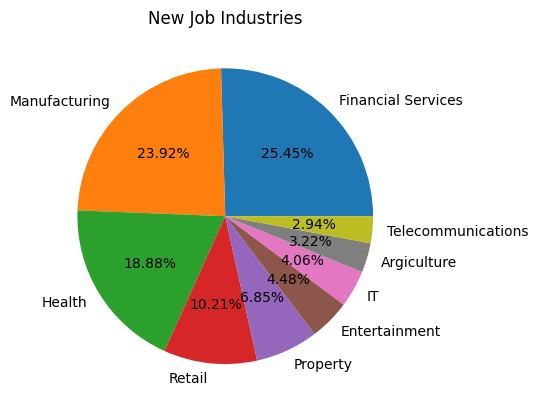

In [138]:
new_cust_list_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

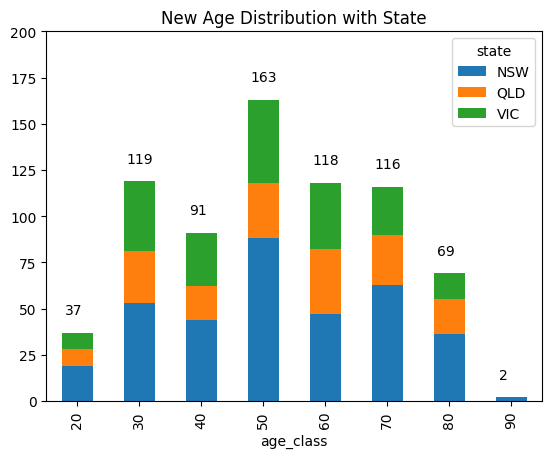

In [139]:
new_cust_list_clean.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.show()

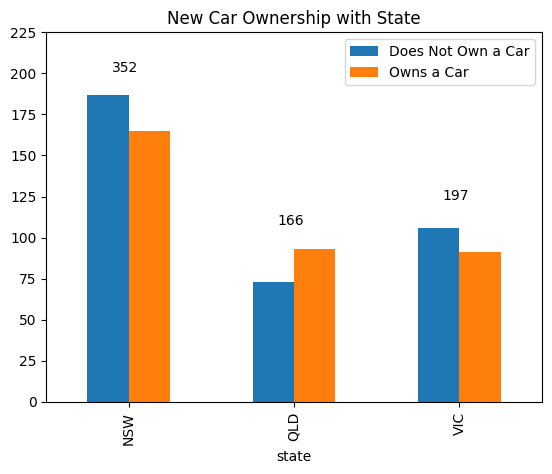

In [140]:
new_cust_list_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

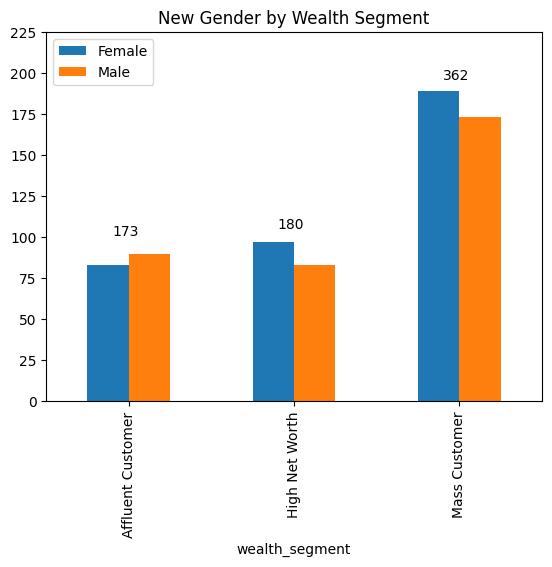

In [141]:
new_cust_list_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

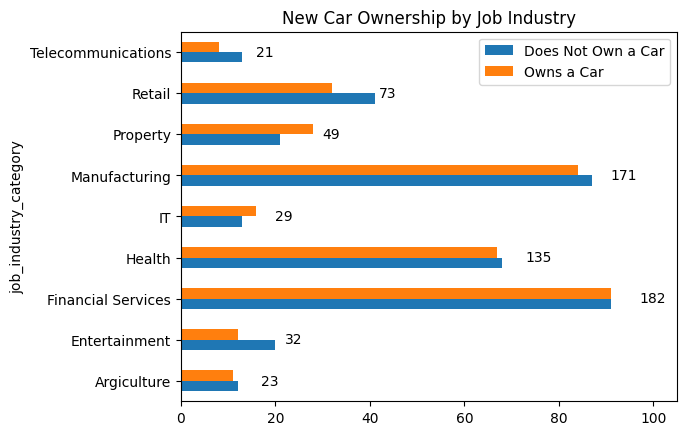

In [142]:
new_cust_list_clean.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

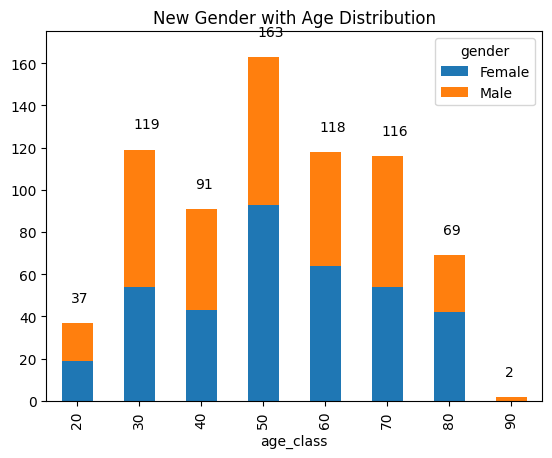

In [143]:
new_cust_list_clean.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender with Age Distribution')
plt.show()

In [144]:
addr_demo_txns['customer_segment'] = addr_demo_txns['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
addr_demo_txns

Output hidden; open in https://colab.research.google.com to view.

In [145]:
top_1000 = addr_demo_txns.sort_values('rfm_class').head(1000)
top_1000

recency  frequency  monetary_value  r_score  f_score  m_score  \
customer_id                                                                  
973              8.0          8         6639.85        1        1        1   
2391            12.0         10         5862.45        1        1        1   
1000             0.0          9         5383.48        1        1        1   
2464             2.0         13         7817.10        1        1        1   
2476            14.0         14         7493.23        1        1        1   
200              7.0          9         7283.86        1        1        1   
2492             7.0         10         8437.43        1        1        1   
946              2.0          8         6305.60        1        1        1   
2523            14.0          9         4572.03        1        1        1   
925             12.0          9         4371.16        1        1        1   
2379             3.0         11         8252.73        1        1        1   
906             16.0          9         4473.87        1        1        1   
3290             2.0          8         6520.13        1        1        1   
3286             9.0         11         5817.44        1        1        1   
877             17.0          9         4918.87        1        1        1   
2606             5.0         10         4718.43        1        1        1   
832             17.0         11         8366.15        1        1        1   
234             11.0          9         5763.13        1        1        1   
235              2.0         11         4685.82        1        1        1   
820              3.0          9         4381.48        1        1        1   
239              1.0          9         5928.23        1        1        1   
902             14.0          9         6003.05        1        1        1   
2651            15.0          8         6148.63        1        1        1   
1068             4.0         14         4841.71        1        1        1   
1084             4.0         11         6580.56        1        1        1   
2111             6.0          9         4790.82        1        1        1   
2120             2.0          8         4543.18        1        1        1   
2130             1.0          8         4253.77        1        1        1   
2132            18.0          8         6401.83        1        1        1   
2152             1.0          9         4281.08        1        1        1   
2182            17.0          8         4766.82        1        1        1   
2183             8.0         14         6513.30        1        1        1   
1233            14.0          9         6634.14        1        1        1   
1232             4.0          9         5011.90        1        1        1   
1076             9.0         12         8104.54        1        1        1   
2308            13.0          9         5077.97        1        1        1   
3337             6.0          8         4608.00        1        1        1   
165              8.0          8         6107.04        1        1        1   
1091             4.0         10         4183.81        1        1        1   
167             14.0          9         5993.34        1        1        1   
2369             1.0          8         6854.59        1        1        1   
1086            13.0          9         4705.65        1        1        1   
171             18.0          8         4833.14        1        1        1   
173             15.0          9         6549.51        1        1        1   
174             11.0         10         7628.24        1        1        1   
2340             5.0          9         4585.40        1        1        1   
2109             2.0          8         5263.13        1        1        1   
3262             1.0         10         4290.81        1        1        1   
2653             3.0          9         7365.48        1        1        1   
3191             7.0          8    

In [147]:
pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 6.6 MB/s eta 0:00:00


In [148]:
writer = pd.ExcelWriter('kpmg_cleaned_data.xlsx',
                        engine = 'xlsxwriter')
addr_demo_txns.to_excel(writer, sheet_name = 'Dataset')
top_1000.to_excel(writer, sheet_name = 'Top 1000')
writer.save()
writer.close()

<ipython-input-148-066e4eec6800>:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
/usr/local/lib/python3.10/dist-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
